In [1]:
import statsmodels.api as sm
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
print(data.DESCR)

In [4]:
print(data.feature_names)
print(data.target)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 

In [6]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
target.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [8]:
## Without a constant

import statsmodels.api as sm

X = df["RM"]
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):          3.74e-256
Time:                        08:02:43   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line

Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

The coefficient of 3.634 means that as the RM variable increases by 1, the predicted value of MDEV increases by 3.634. A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the RM has statistically significant p-value; there is a 95% confidence intervals for the RM (meaning we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759).

In [0]:
import statsmodels.api as sm # import statsmodels 

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           2.49e-74
Time:                        14:40:31   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the Table — With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin, but now we have a y-intercept at -34.67. We also changed the slope of the RM predictor from 3.634 to 9.1021.

In [0]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     4637.
Date:                Fri, 21 Dec 2018   Prob (F-statistic):               0.00
Time:                        14:41:58   Log-Likelihood:                -1582.9
No. Observations:                 506   AIC:                             3170.
Df Residuals:                     504   BIC:                             3178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the Output — We can see here that this model has a much higher R-squared value — 0.948, meaning that this model explains 94.8% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher, but this is a pretty high R². We can see that both RM and LSTAT are statistically significant in predicting (or estimating) the median house value; not surprisingly , we see that as RM increases by 1, MEDV will increase by 4.9069 and when LSTAT increases by 1, MEDV will decrease by -0.6557. As you may remember, LSTAT is the percentage of lower status of the population, and unfortunately we can expect that it will lower the median value of houses. With this same logic, the more rooms in a house, usually the higher its value will be.

# **Linear Regression in SKLearn**
SKLearn is pretty much the golden standard when it comes to machine learning in Python. It has many learning algorithms, for regression, classification, clustering and dimensionality reduction

In [14]:
from sklearn import linear_model
from sklearn import datasets ## imports datasets from scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

data = datasets.load_boston() ## loads Boston dataset from datasets library

df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

X = df
y = target["MEDV"]
#print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
print(predictions)

[15.42928504 21.36022222 17.04927502 16.25144176 42.18665404 15.78982314
 32.31882728 30.73702449 40.06398547 35.11622137 24.46852588 30.77196179
 20.14972308 18.278204   24.83313477 18.00531888 41.06421541 26.49870355
 36.46250346 26.79574373 20.61846536 26.67210172 25.65065936 20.37553559
 19.99747944 31.1032313  11.08871168 16.70928523 25.59918834 14.36737492
 24.14601486 23.63247839  9.92382338 20.62995414 21.99344764 27.78153033
 33.25858238 11.76931037 23.97891698 25.08611403 22.45862477 29.33952995
 20.26080953 25.47263568 37.09454692 27.245612   18.61646211 16.24339263
 18.62381034 26.94230821 17.0689497  16.25330344 30.35778427 27.99665548
 16.1948064  37.60541396 14.31416989 31.08919452 42.82314344 33.21644917
 19.61733917 18.83695515 30.51244851 24.34357172 31.08832736 23.58519846
 20.10707866 16.67664463 18.66304327 18.23705426 22.1577781  23.94490123
 25.54722111 30.62623018  8.45111904 13.33801141 31.81050603 17.90254263
 21.50050719 34.61283554 17.8096501  23.5092057   6

In [15]:
lm.score(X_test,y_test)

0.7054253625829155

# **Linear Regression with Feature Selection**

In [0]:
from sklearn import datasets ## imports datasets from scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

data = datasets.load_boston() ## loads Boston dataset from datasets library

df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

X = df
y = target["MEDV"]
#print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.6172947973863403

In [23]:
from sklearn.linear_model import Lasso

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
lasso001.score(X_test,y_test)

0.7088947379110226

In [24]:
from sklearn.linear_model import Lasso

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
lasso00001.score(X_test,y_test)

0.7099575231248161

In [26]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train,y_train)

lm.score(X_test,y_test)

0.709961465524497

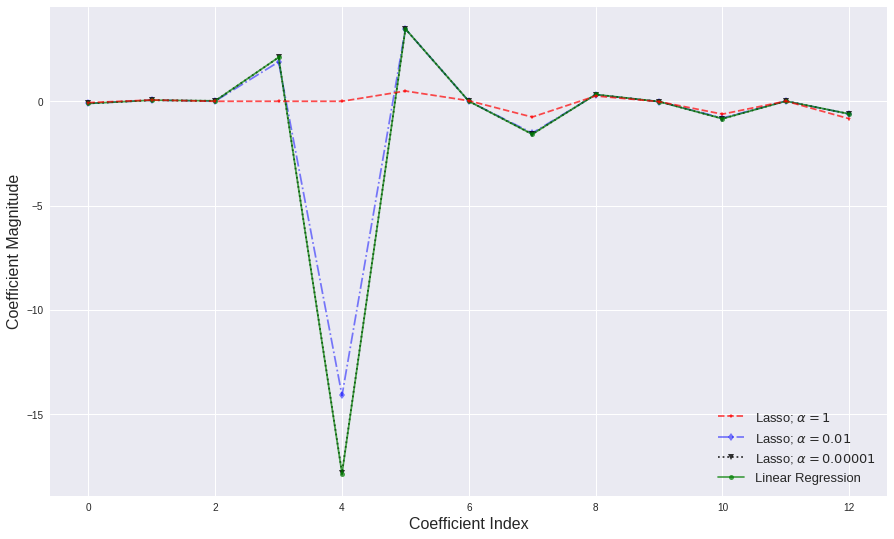

In [37]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(15,9))

plt.plot(lasso.coef_,alpha=0.7,linestyle='dashed',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)

plt.plot(lasso001.coef_,alpha=0.5,linestyle='dashdot',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')

plt.plot(lasso00001.coef_,alpha=0.8,linestyle='dotted',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$')

plt.plot(lm.coef_,alpha=0.7,linestyle='solid',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

plt.show()